<h1><center> 10-315 Introduction to Machine Learning (SCS Majors) <br> Lecture 21: PCA </center></h1> 


<h1><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h1> 


<br>

<br>

<br>

<br>


Lecture based on material from Ryan Tibshirani ([link1](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf), [link2](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/08-dim2.pdf)) and Nina Balcan ([link](http://www.cs.cmu.edu/~ninamf/courses/315sp19/lectures/4_15-PCA.pdf)).

### Lecture outcomes
- Two definitons for principal component analysis
- Relationship to SVD
- How to use it

### Links (use the version you need)


- [Notebook](https://github.com/lwehbe/10315_S21/blob/main/Lecture_21_PCA.ipynb)

- [PDF slides](https://github.com/lwehbe/10315_S21/raw/main/Lecture_21_PCA.slides.pdf)

## Dimension reduction

- Dimension reduction refers to reducing the number of features for our data, by preserving the important aspects of the original structure and removing redundant information.

- Clustering is an example of dimension reduction: you replace the features of a point by its cluster center.

- We will look at another dimension reduction technique: Principal Component Analysis (PCA). Specifically, we learn a linear projection of the data into a new space, and we can decide how many of the dimensions of the space to keep (depending on how much of the original data we want to preserve).


## Learning Representations

- PCA is also an example of representation learning.
- Other examples: Kernel PCA, ICA...
- Extract hidden and potentially lower dimensional structure from high dimensional datasets
- Useful for:
    - Visualization
    - More efficient use of resources
    - Statistical robustness: better generalization
    - Noise removal
    - Combination with machine learning algorithms


## Reminder: projection onto unit vectors

- A unit vector $v$ is a vector with unit norm: $||{\bf v}||_2^2 = v\cdot v =  \langle v,v \rangle = v^\top v = 1$


- Remember $v\cdot v$ and $\langle v,v \rangle$ and $v^\top v$ are different ways to express the dot product of $v$ with itself.


- The projection of $x\in \mathbb{R}^p$ onto $v$ is $ (x^\top v ) v$

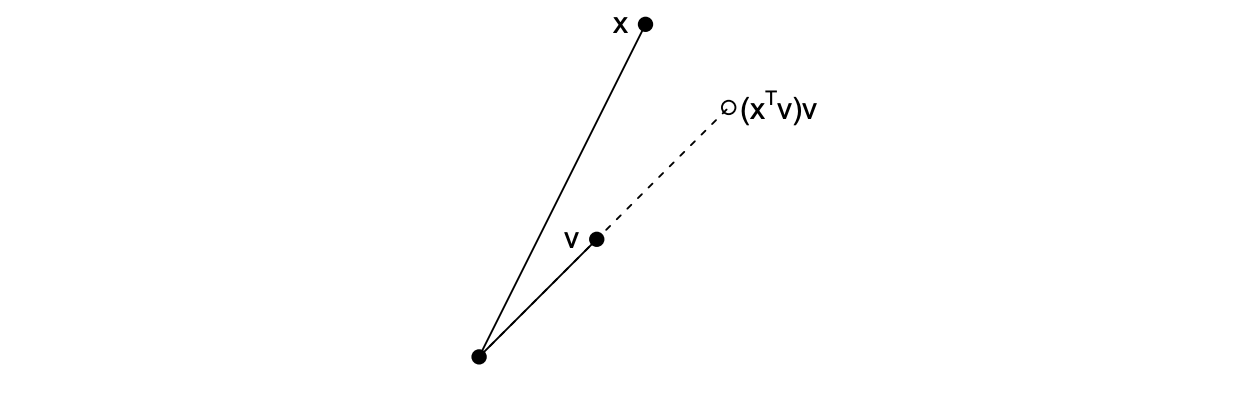

Figure from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf)


## Reminder: projection onto unit vectors

- Consider a matrix $X \in \mathbb{R}^{n\times p}$: 
$
{X} = \left [ \begin{array}{c} { x}_1^\top\\ { x}_2^\top\\...\\{ x}_n^\top \end{array} \right ] 
$ and consider projecting each row $x_i \in \mathbb{R}^p$ onto $v$.
-The entries of $
{Xv} = \left [ \begin{array}{c} { x}_1^\top v\\ { x}_2^\top v\\...\\{ x}_n^\top v \end{array} \right ] 
 \in \mathbb{R}^n$ are the scores and the rows of ${Xvv^\top} \in \mathbb{R}^{n\times p} $ are the projected vectors. 

## Example: projection onto unit vectors 

Example: $ X \in \mathbb{R}^{50\times2}$ and $v_1, v_2 \in \mathbb{R^2}$

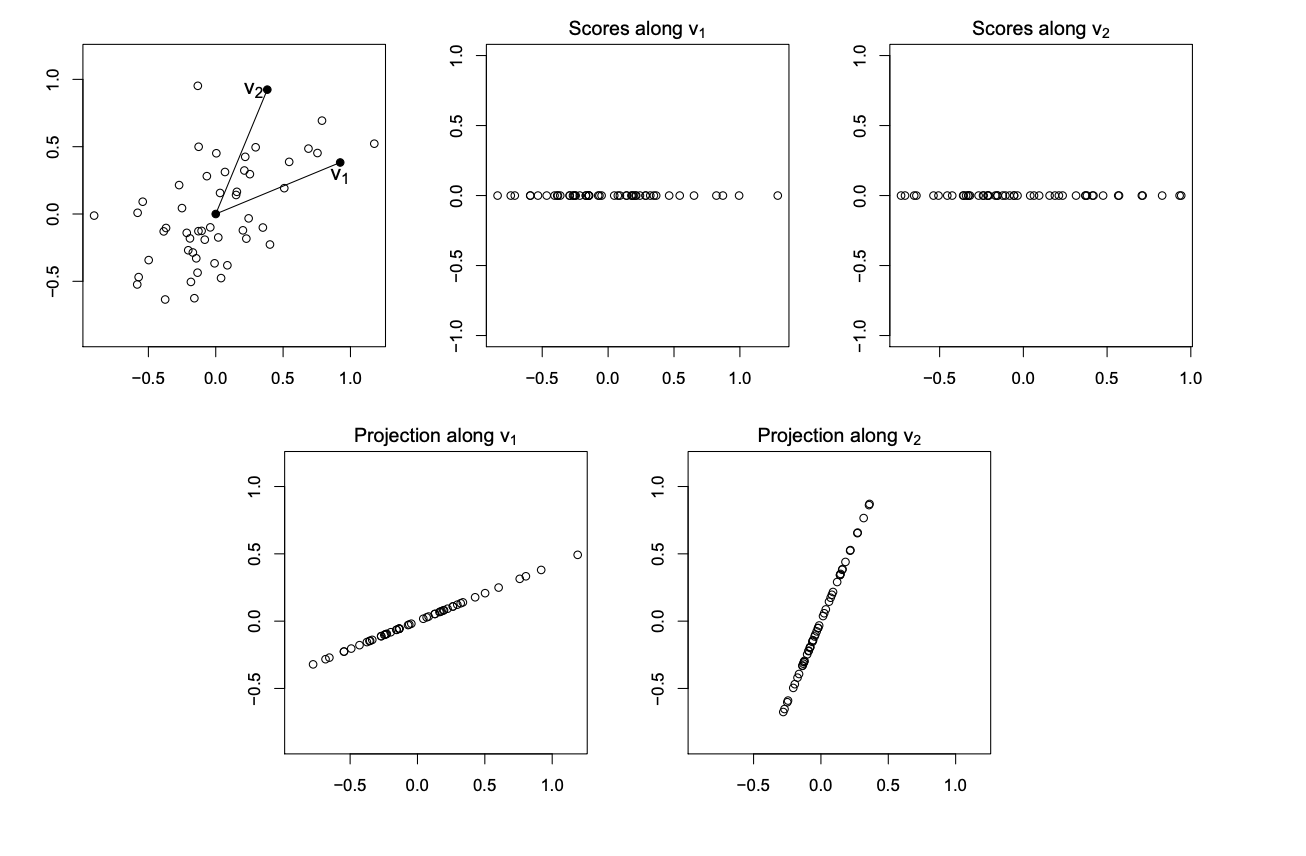
Figure from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf)

## Review: projections onto orthonormal vectors

- Vectors  $v_1, v_2 \in \mathbb{R}^p$ are orthogonal if $v_1^\top v_2 = 0$ and vectors $v_1 ... v_k \in \mathbb{R}^p$ are orthogonal if $v_i^\top v_j = 0$ for any $i,j$.
- Vectors $v_1 ... v_k \in \mathbb{R}^p$ are orthonormal if they are orthogonal and each $v_i$ has a unit norm.
- The projection of $x\in\mathbb{R}^p$ onto the space spanned by orthonormal vectors $v_1 ... v_k \in \mathbb{R}^p$ is $\sum_{j=1}^k(x^\top v_j)v_j$. The score along the $j$th dimention of that space is $x^\top v_j$.

## Review: projections onto orthonormal vectors
- Write the collection of orthonormal vectors as: $V = [v_1,v_2,...,v_k] \in \mathbb{R}^{p\times k}$ (each vector is a column).
- Consider a data matrix $X \in \mathbb{R}^{n\times p}$.
- The score of the projection of $X$ onto the space spanned by the orthonormal vectors $v_1...v_k$ is: $XV = [Xv_1, Xv_2...Xv_k] \in \mathbb{R}^{n\times k}$. For each dimension $j$, these scores are $
{Xv_j} = \left [ \begin{array}{c} { x}_1^\top v_j\\ { x}_2^\top v_j\\...\\{ x}_n^\top v_j \end{array} \right ] 
 \in \mathbb{R}^n$.
 
- The projections are the rows of $XVV^\top \in \mathbb{R}^{n\times p}$

## Example: projections onto orthonormal vectors

Example: $ X \in \mathcal{R}^{2000\times3}$ and $v_1, v_2, v_3 \in \mathcal{R^3}$ are the unit vectors
parallel to the coordinate axes

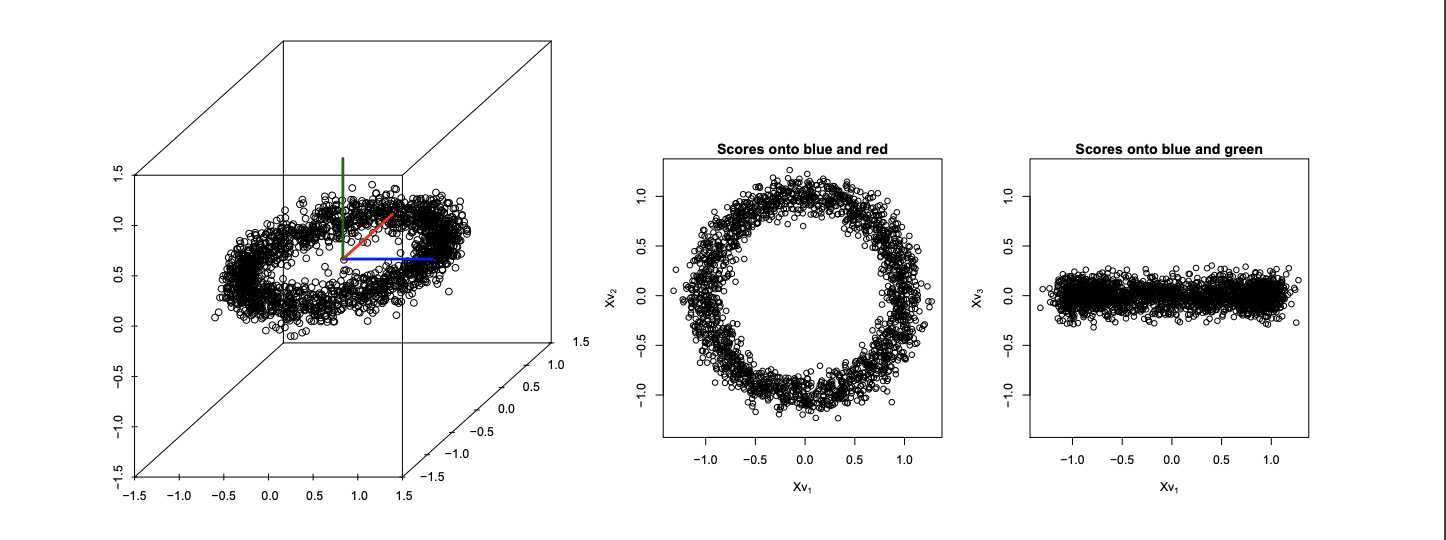

Figure from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf)

What makes a good projection? Not all are as useful as each other.

## Principal Component Analysis (PCA)

- PCA is a very established technique that has been around for a very long time. 

- We will consider here that our data is of the form $X \in \mathbb{R}^{n\times p}$ where each row is a data point with $p$ features.

- We assume that our data has been centered: all the columns have mean 0. We have removed the sample mean:
$$\tilde X = X - \mathbb{1}\bar X^\top \in \mathbb{R}^{n\times p}$$
where $\mathbb{1}$ is a vector of ones in $\mathbb{R}^n$, and $\bar X$ is the sample mean.

- In the rest of the lecture we assume that $X$ has already been centered and we drop the tilde notation.
    - Centering makes things easier: the scores $Xv$ will have a sample mean of 0, and a sample variance of $\frac{1}{n}(Xv)^\top(Xv) = \frac{1}{n}||Xv||^2_2$

- PCA is a projection of the original data onto an orthonormal basis. But which one?

## First principal component 

- The first principal component direction of $X$ is the unit vector $v_1$ that produces the maximal sample variance of the scores $Xv_1 \in \mathbb{R}^n$.

- We maximize the sample variance:

\begin{eqnarray}
v_1 &=& \underset{||v||_2=1}{\operatorname{argmax}} \frac{1}{n}(Xv)^\top(Xv) = \underset{||v||_2=1}{\operatorname{argmax}} (Xv)^\top(Xv) 
\end{eqnarray}

- $\frac{1}{n}(Xv_1)^\top(Xv_1)$ is the amount of variance explained by the first principal component direction $v_1$.

## First principal component 

Same example as earlier, also from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf):
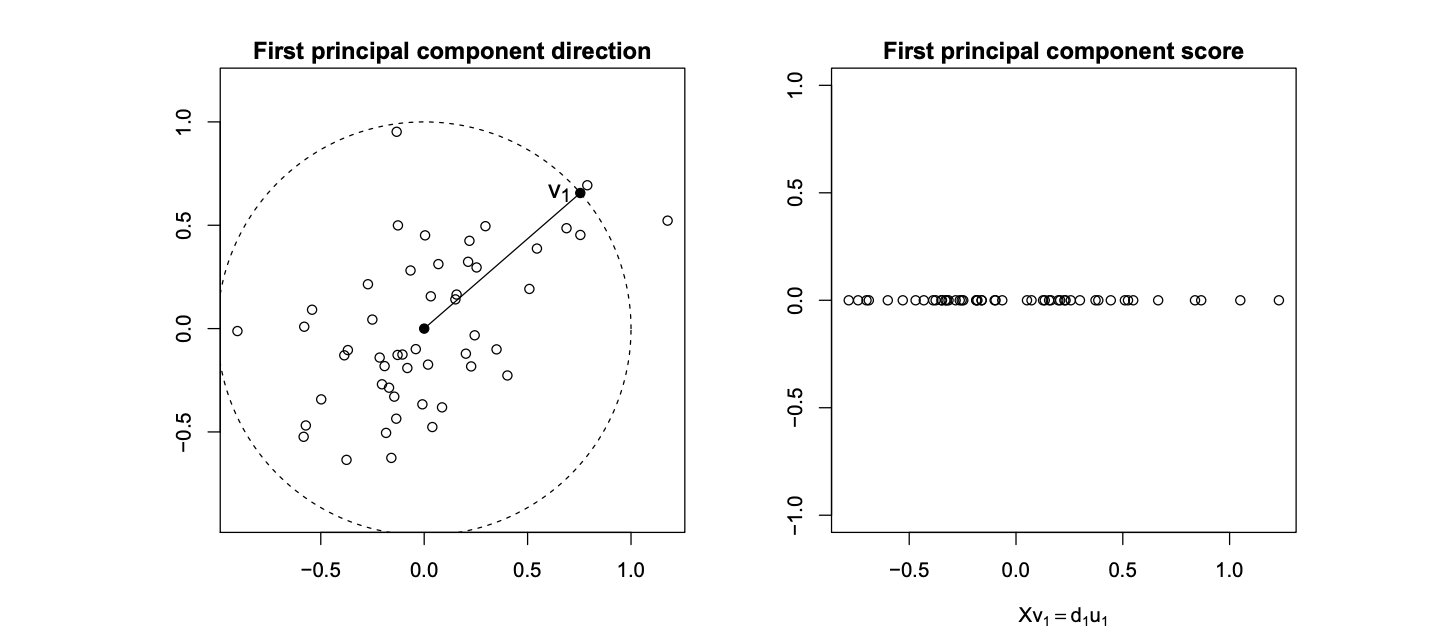

## Second principal component

- Successively find orthogonal directions of highest variance:  we have already explained the variance along $v_1$ and now we want to look at variance in other directions.

- The second  principal component direction of $X$ is the unit vector $v_2$, orthogonal to $v_1$ (i.e. $v_2^\top v_1=0$) that produces the maximal sample variance of the scores $Xv_2 \in \mathbb{R}^n$ over all unit vectors orthogonal to $v_1$.


\begin{eqnarray}
v_2 &=& \underset{||v||_2=1 \\ v^\top v_1=0}{\operatorname{argmax}}   (Xv)^\top(Xv) 
\end{eqnarray}

- $\frac{1}{n}(Xv_2)^\top(Xv_2)$ is the amount of variance explained by the second principal component direction $v_2$.

## Second principal component

Same example as earlier, also from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf):

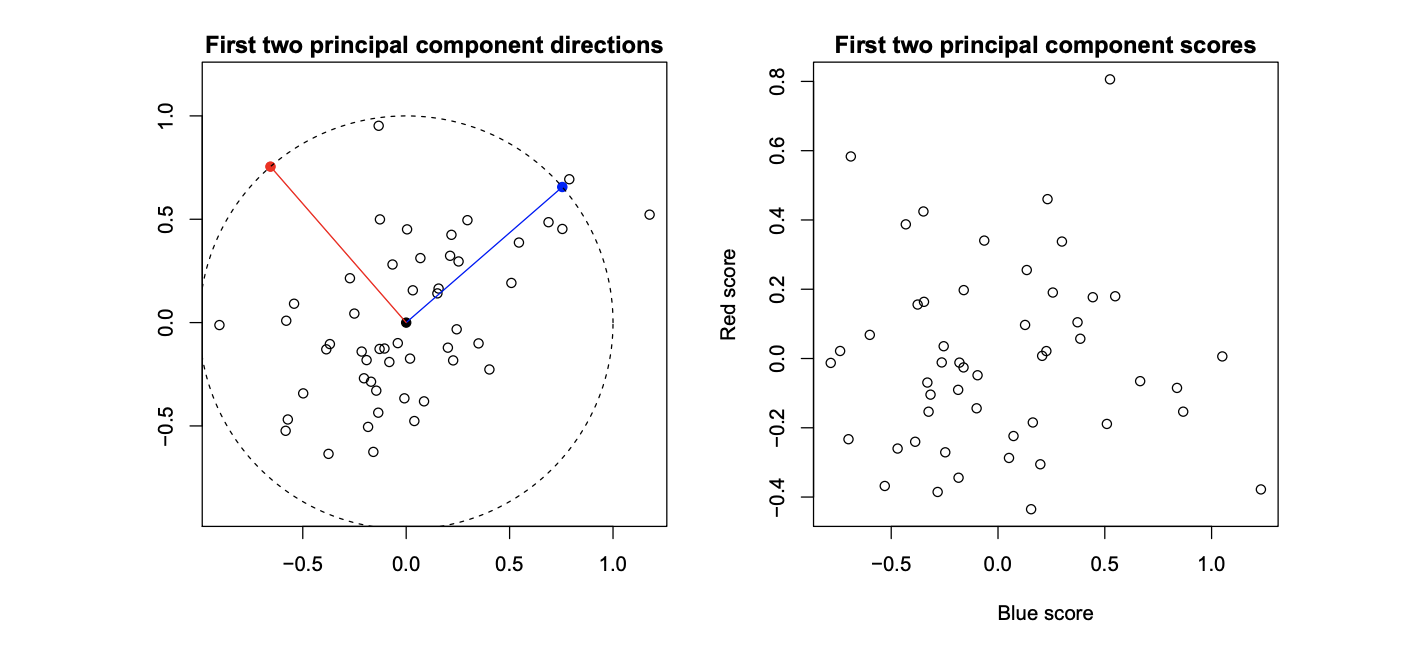

## Further principal components

- Given the first $k-1$ principal components $v_1...v_{k-1}\in \mathbb{R}^p$ (which are orthonormal), the $k$th principal component direction $v_k\in\mathbb{R}^p$ is:
\begin{eqnarray}
v_2 &=& \underset{||v||_2=1 \\ v^\top v_j=0, j=1...k-1}{\operatorname{argmax}}   (Xv)^\top(Xv) 
\end{eqnarray}
- $Xv_k \in \mathbb{R}^n$ are the $k$th pricipal component scores of $X$, and $\frac{1}{n}(Xv_k)^\top(Xv_k)$ is the amount of variance explained by the $k$th pricipal component direction $v_k$. 

### Example PC scores

Same example as earlier, also from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf):

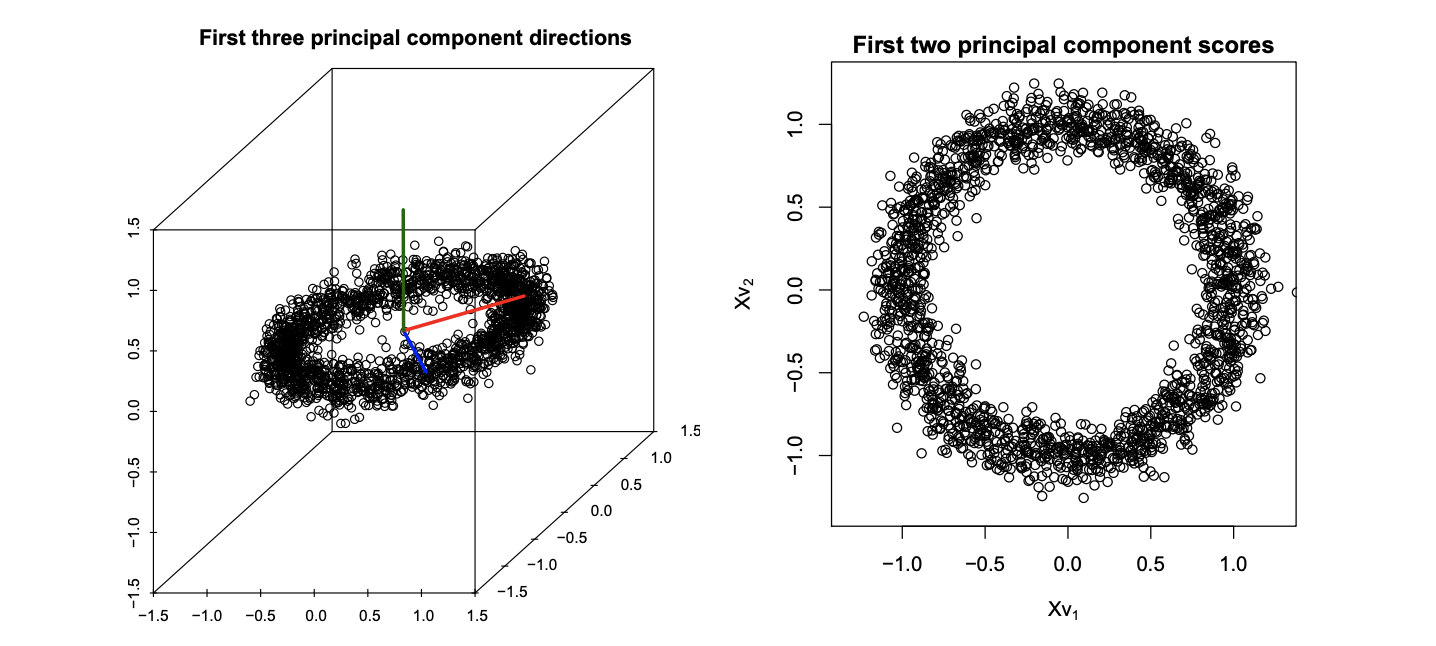

### Example: reconstruction of the original data by projection

Same example as earlier, also from [Ryan Tibshirani's PCA lecture](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/07-dim1.pdf):

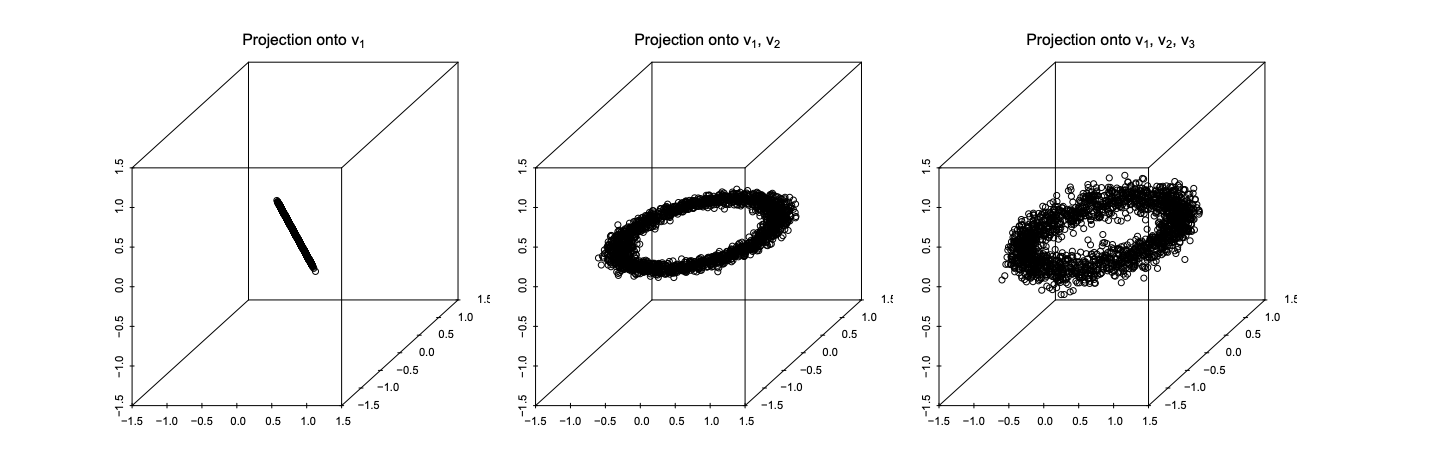

Why does the third plot look exactly the same as the original data?

## Principal component analysis

- We defined the first principal component direction $v_1$ as:

\begin{eqnarray}
v_1 &=& \underset{||v||_2=1}{\operatorname{argmax}} (Xv)^\top(Xv) = \underset{||v||_2=1}{\operatorname{argmax}}  v^\top X^\top X v
\end{eqnarray}

- We can use the langragian to wrap the constraints into the objective function, with $\lambda_1>0$: 

\begin{eqnarray}
v_1 &=& \underset{v}{\operatorname{argmax}}  v^\top X^\top X v -\lambda_1 (v^\top v-1)
\end{eqnarray}

Taking the derivative with respect to $v$ and setting to 0:

\begin{eqnarray}
2X^\top X v_1 - 2\lambda_1 v_1 = 0\\
X^\top X v_1 = \lambda_1 v_1
\end{eqnarray}

$X^\top X$ is the unnormalized empirical covariance matrix of the data (the empirical covariance matrix is $X^\top X/n$). Remember that  $X^\top X$ is a $p\times p$ matrix and is an outer-product of the data points, not an inner-product!



## Principal component analysis

\begin{eqnarray}
X^\top X v_1 = \lambda_1 v_1
\end{eqnarray}

- Thus, $v_1$ is an **eigenvector** of $X^\top X$!
- And the amount of variance explained by $v_1$:
\begin{eqnarray}
\frac{1}{n}(Xv_1)^\top(Xv_1) = \frac{1}{n} v_1^\top X^\top X v_1 =  \frac{1}{n} \lambda_1  v_1^\top v_1 = \frac{\lambda_1}{n} 
\end{eqnarray}
Where $\lambda_1$ is the first eigenvalue of $X^\top X$.

- Further, the following principal component directions also correspond to the following eigenvectors
    - $v_j$ is the $j$th eigenvector of the sample covariance matrix $X^\top X$ associated with the $j$th eigenvalue  $\lambda_j$. 
    - the amount of variance explained by $v_j$ is $\frac{\lambda_j}{n} $
    - the amount of variance explained by $v_1,v_2,...v_j$ is $\frac{\sum_{i}\lambda_i}{n} $

## Singular Value Decomposition (SVD)


- The SVD of $X$ is closely related to the eigenvalue decomposition of $X^\top X$:

- The SVD of an $n\times p$ matrix X is a factorization of the form $$X = {U S V^\top}$$
    - U is an $n\times n$ orthonormal matrix
    - ${S}$ is a $n\times p$ diagonal martrix where the diagonal items $s_j$s are the singular values of $X$. $s_j^2 = \lambda_j$
    - V is an $p\times p$ orthonormal matrix
    
    

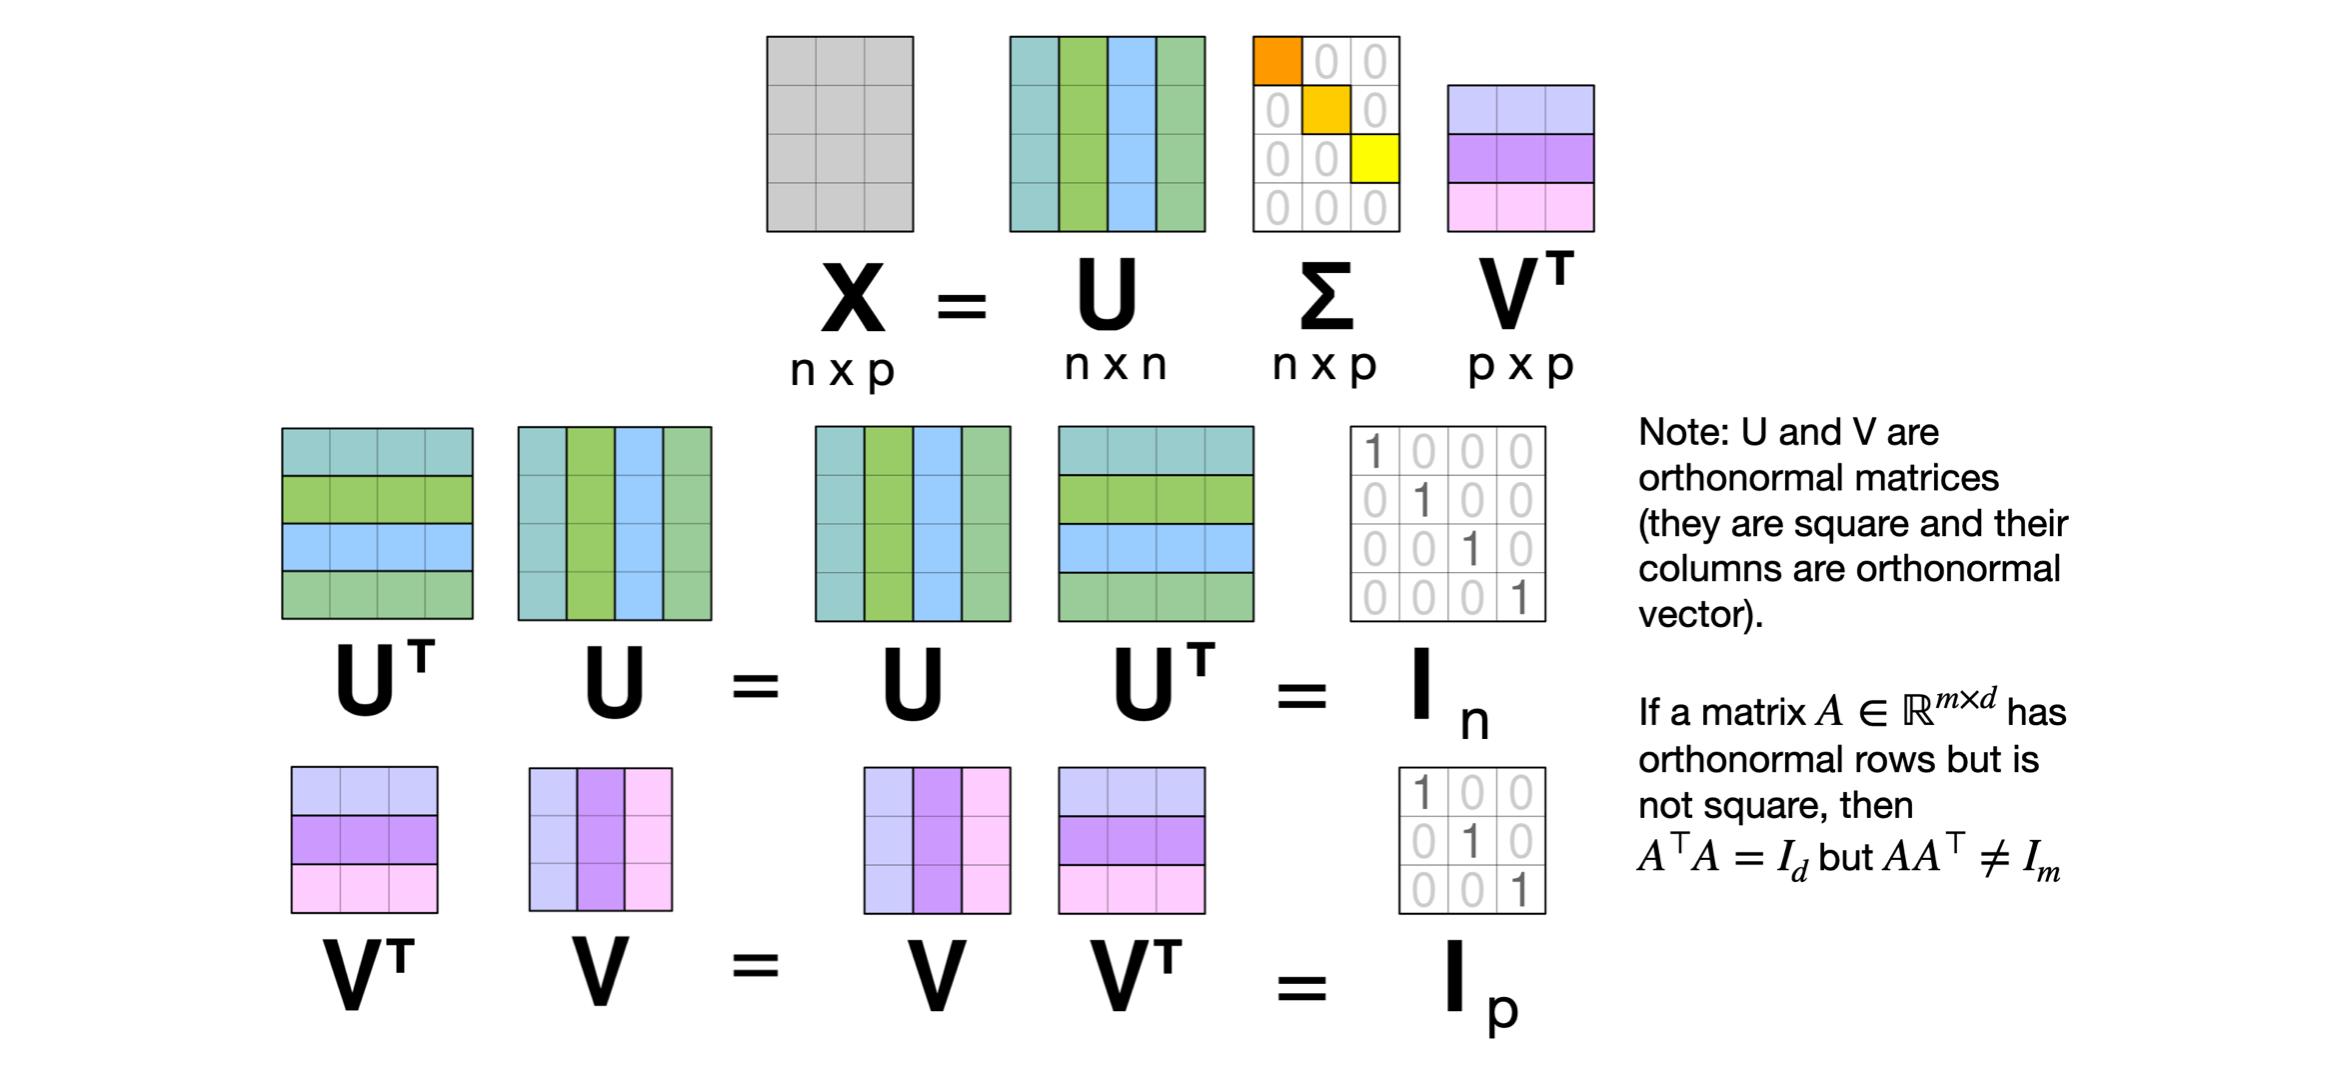
Figure adapted from [Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular_value_decomposition_visualisation.svg).

## Eigenvalue decomposition

- For a real matrix $X$, the SVD always exists and the singular values $s_j$ are positive.
- The eigenvalue decomposition only exists for square matrices, and the eigenvalues are only positive if the matrix is positive semi-definite.
- A covariance matrix $X^\top X$ is always positive semi-definite. It's easy to verify:

$$X^\top X = (U S V^\top)^\top(U S V^\top) = VS^\top U^\top U S V^\top = V \Lambda V^\top $$
- Where $\Lambda$ is a diagonal matrix where the diagonal elements $\lambda_j = s_j^2$ are the eigenvalues of $X^\top X$, and the columns of $V$ are the eigenvectors of $X^\top X$.




## Interpretation of PCA: Maximum Variance subspace

- We can therefore interpret PCA as finding a subspace (spanned by the first $k$ components) onto which to projected the data that maximizes the variance of data captured:


 $$\frac{\sum_{j = 1}^k v_j^\top X^\top X v_j  }{n}  = \frac{\sum_{j = 1}^k \lambda_j  }{n} $$

- As seen above, we can obtain the PC projection by taking the SVD decomposition of $X$ (after centering) and projecting onto the right singular vectors in the matrix $V$, and keeping the $k$ top PCs, according to how much variance we which to retain. 

- The principal component scores will be:
    $$ XV_{:,1:k} \in \mathbb{R}^{n\times k}$$
    
- The principal component projection will be:   

$$ XV_{:,1:k} V^\top_{:,1:k} \in \mathbb{R}^{n\times p}$$

## Interpretation of PCA: Maximum Variance subspace

- The share of the total variance of the first $k$ components is:

 $$ \frac{\frac{1}{n} \sum_{j = 1}^k \lambda_j  }{\frac{1}{n} \sum_{j = 1}^p \lambda_j } = \frac{\sum_{j = 1}^k \lambda_j  }{\sum_{j = 1}^p \lambda_j } $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn import datasets
X = datasets.load_breast_cancer(return_X_y=True)[0]
from scipy.stats import zscore

In [26]:
X = zscore(X) # this command removes the mean, but also scales by the standard deviation
# the variables here have a different scale, and that's why I made this choice
# whether or not to scale depends on your data, and what the dimensions mean
from numpy.linalg import svd
U,S,V_transpose = svd(X) # careful, svd() returns the transpose of V
V = V_transpose.T
print('U shape: {}, S shape: {}, V shape: {}'.format(U.shape, S.shape, V.shape)) 
# S only has the diagonal elements

U shape: (569, 569), S shape: (30,), V shape: (30, 30)


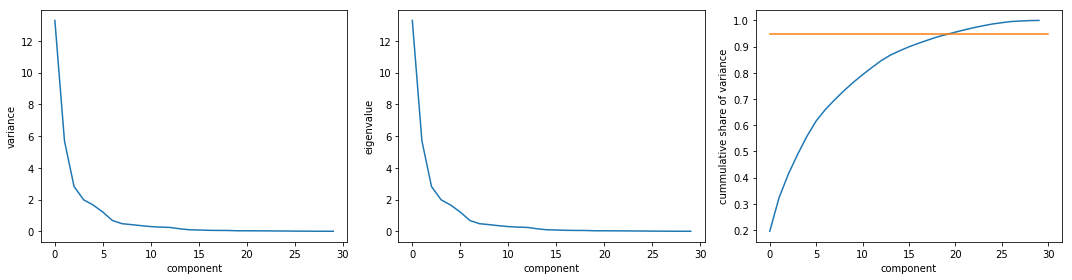

In [27]:
X_proj = X.dot(V)
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (15,4),sharey=False)

ax[0].plot(X_proj.var(axis=0));
ax[0].set_xlabel('component'); ax[0].set_ylabel('variance');

ax[1].plot(S**2/X.shape[0]); 
ax[1].set_xlabel('component');  ax[1].set_ylabel('eigenvalue');

ax[2].plot(np.cumsum(S)/np.sum(S)); 
ax[2].set_xlabel('component');  ax[2].set_ylabel('cummulative share of variance');
ax[2].plot([0,X.shape[1]],[0.95,0.95]); 

plt.tight_layout();

## Alternative Interpretation of PCA: Minimizing the Reconstruction Error

- We saw that the reconstruction of the data into the original subspace, given a vector $v$, is:   

$$ Xv v^\top \in \mathbb{R}^{n}$$



- The reconstruction error is:

$$ \frac{1}{n} ||X - Xv v^\top||_2^2 = \frac{1}{n} \sum_{i=1}^n (x_i - (x_i^\top v) v)^2$$


- The first pricipal component will be the vector that minimizes the reconstruction error:

\begin{eqnarray}
v_1 &=& \underset{||v||_2=1}{\operatorname{argmax}} \frac{1}{n} ||X - Xv v^\top||_2^2 
\end{eqnarray}

## Alternative Interpretation of PCA: Minimizing the Reconstruction Error


- And similarly the $k$th principal components will be a normal vector that is orthogonal to $v_1...v_{k-1}$ that minimize the reconstruction error, such that:

\begin{eqnarray}
v_k &=& \underset{||v||_2=1\\ v^\top v_j=0, j=1...k-1}{\operatorname{argmax}} \frac{1}{n} ||X - XV_{:,1:k-1}V_{:,1:k-1}^\top -  Xv v^\top||_2^2  
\end{eqnarray}



- It turns out that this formulation of principal components in terms of Minimizing the Reconstruction Error results in exactly the same mathematical solution as the Maximum Variance Direction interpretation. PCA can be seen as doing both. Think about the Pythagorean Theorem:

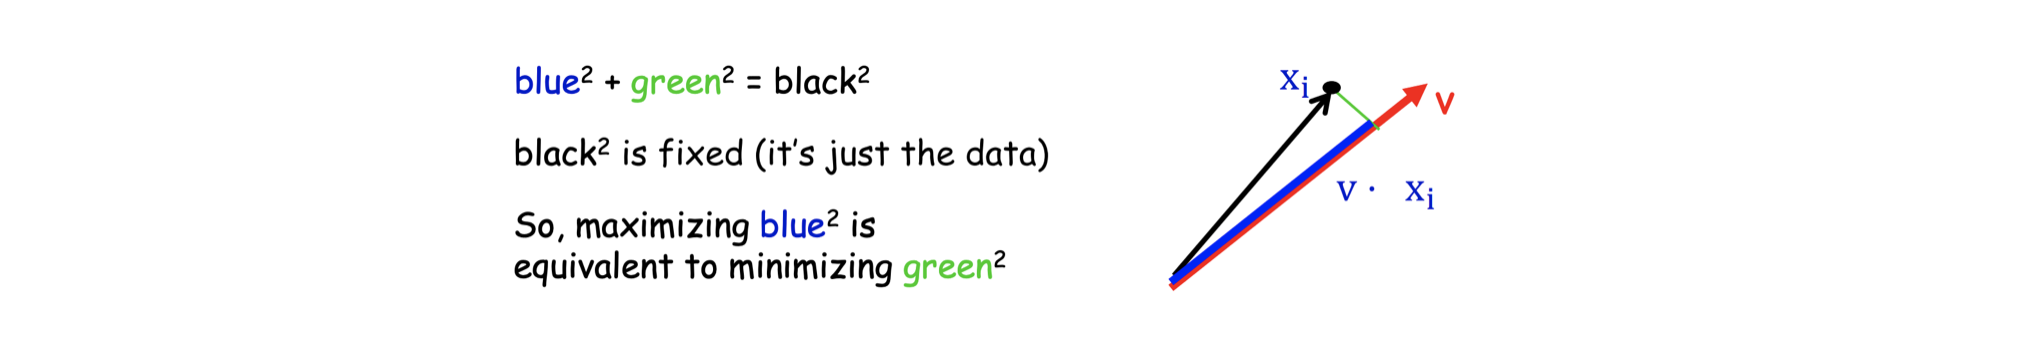
From [Nina Balcan's lecture](http://www.cs.cmu.edu/~ninamf/courses/315sp19/lectures/4_15-PCA.pdf)

## PCA as dimensionality reduction

- The matrix of  principal component scores will be our lower dimensional representation of $X$:
    $$ XV_{:,1:k} \in \mathbb{R}^{n\times k}$$
    
- It will capture  $\frac{\sum_{j = 1}^k \lambda_j  }{\sum_{j = 1}^p \lambda_j } $ of the data.

- SVD returns $p$ singular-values. Using $k=p$ will preserve all the variance in the data, and reconstruct the data perfectly.

- If $n<p$, then $s_{n+1},s_{n+2}...s_p$ will be 0 (and equivalently $\lambda_{n+1},\lambda_{n+2}...\lambda_p = 0$).

- More formally the number of non-zero singular values of $X$ is equal to its rank.

- We can decide to preserve the number of PCs that we want, to get the proportion of variance that we desire.

- The assumption this approach makes is that that low PCs are mostly noise. 


Partially adapted from https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

In [29]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
n_row, n_col = 2, 3
n_components = n_row * n_col
from numpy.random import RandomState

rng = RandomState(0)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray, image_shape = (64, 64)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
    
faces= fetch_olivetti_faces(shuffle=True,                                random_state=rng)

Dataset consists of 400 faces


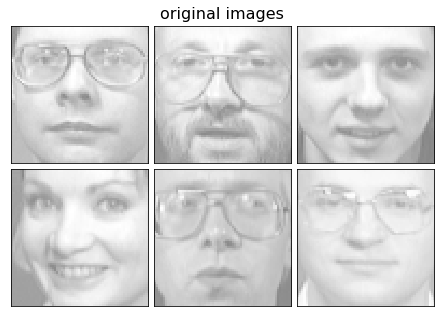

In [30]:
faces = faces.data
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

plot_gallery("original images", faces[10:16])

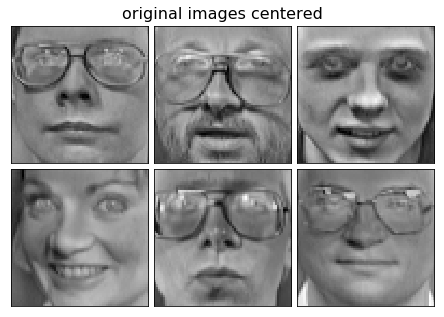

In [31]:
plot_gallery("original images centered", faces_centered[10:16])

shape of U: (400, 400), shape of S: (400,), shape of v: (30, 30)


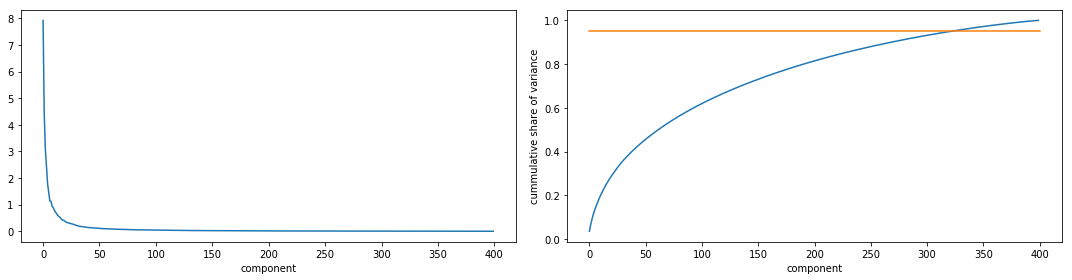

In [32]:
U,S,Vt = svd(faces_centered, full_matrices=False)
print("shape of U: {}, shape of S: {}, shape of v: {}".format(U.shape, S.shape, V.shape))
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,4),sharey=False)

ax[0].plot(S**2/X.shape[0]); 
ax[0].set_xlabel('component');  ax[1].set_ylabel('eigenvalue');

ax[1].plot(np.cumsum(S)/np.sum(S)); 
ax[1].set_xlabel('component');  ax[1].set_ylabel('cummulative share of variance');
ax[1].plot([0,400],[0.95,0.95]); 
plt.tight_layout();

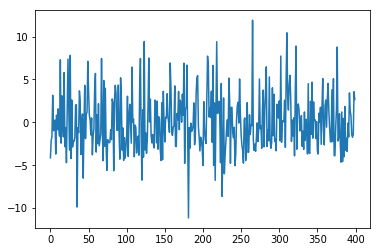

In [33]:
# first PC:
Z = faces_centered.dot(Vt[0:1].T)
plt.plot(Z)

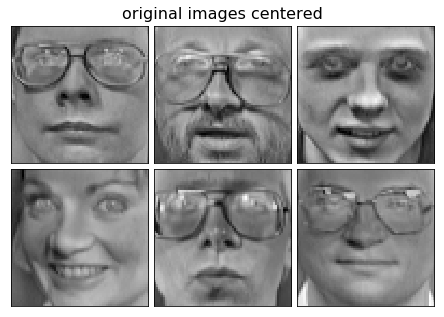

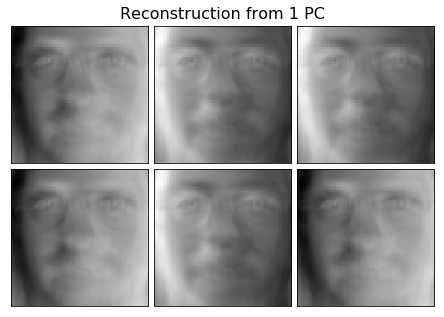

In [34]:
Xbar = Z.dot(Vt[0:1])

plot_gallery("original images centered", faces_centered[10:16])
plot_gallery("Reconstruction from {} PC".format(Z.shape[1]), Xbar[10:16])

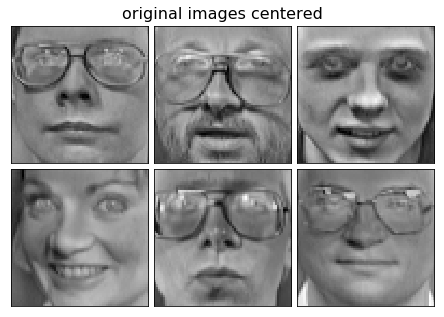

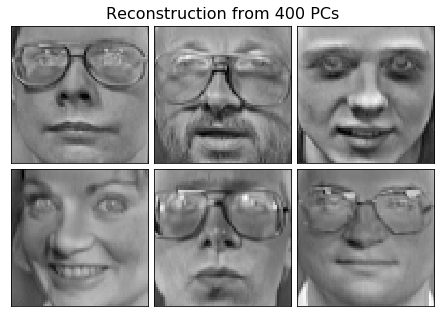

In [35]:
Z = faces_centered.dot(Vt[0:400].T)
Xbar = Z.dot(Vt[0:400])

plot_gallery("original images centered", faces_centered[10:16])
plot_gallery("Reconstruction from {} PCs".format(Z.shape[1]), Xbar[10:16])

## What you should know

- Two definitons for principal component analysis
- Relationship to SVD
- How to use it